In [4]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

In [5]:
Dataset_link='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [6]:
df= pd.read_csv(Dataset_link, parse_dates=True,)
df.reset_index()
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [7]:
df.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
756,2015-09-07,121.60,122.45,118.35,119.90,120.45,1349442,1626.40
1782,2011-07-20,103.00,103.80,100.65,100.90,100.95,568842,580.07
171,2018-01-18,315.05,315.75,301.40,304.50,305.45,3408593,10502.65
1596,2012-04-20,126.00,126.00,120.25,121.95,121.70,3365943,4158.95
1919,2011-01-03,109.00,112.00,108.15,111.60,111.50,1381804,1526.09
633,2016-03-09,115.65,117.50,114.55,116.70,116.85,1555016,1812.31
250,2017-09-26,196.00,206.45,195.30,204.95,204.65,5546594,11185.50
1624,2012-03-09,117.60,118.85,116.80,117.65,118.20,1294468,1527.05
992,2014-09-22,168.00,172.00,167.05,169.50,170.60,4342518,7371.90
616,2016-04-05,121.00,121.15,118.00,118.20,118.25,1663091,1986.04


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [9]:
df.shape

(2035, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [12]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


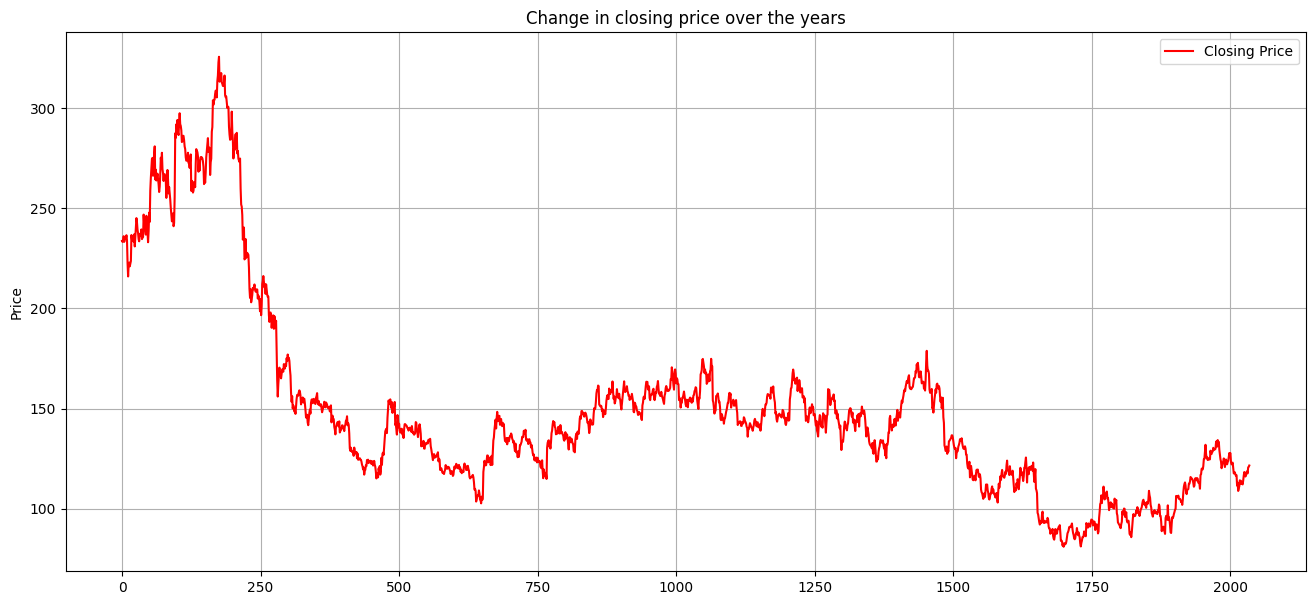

In [13]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(16,7),color='r',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

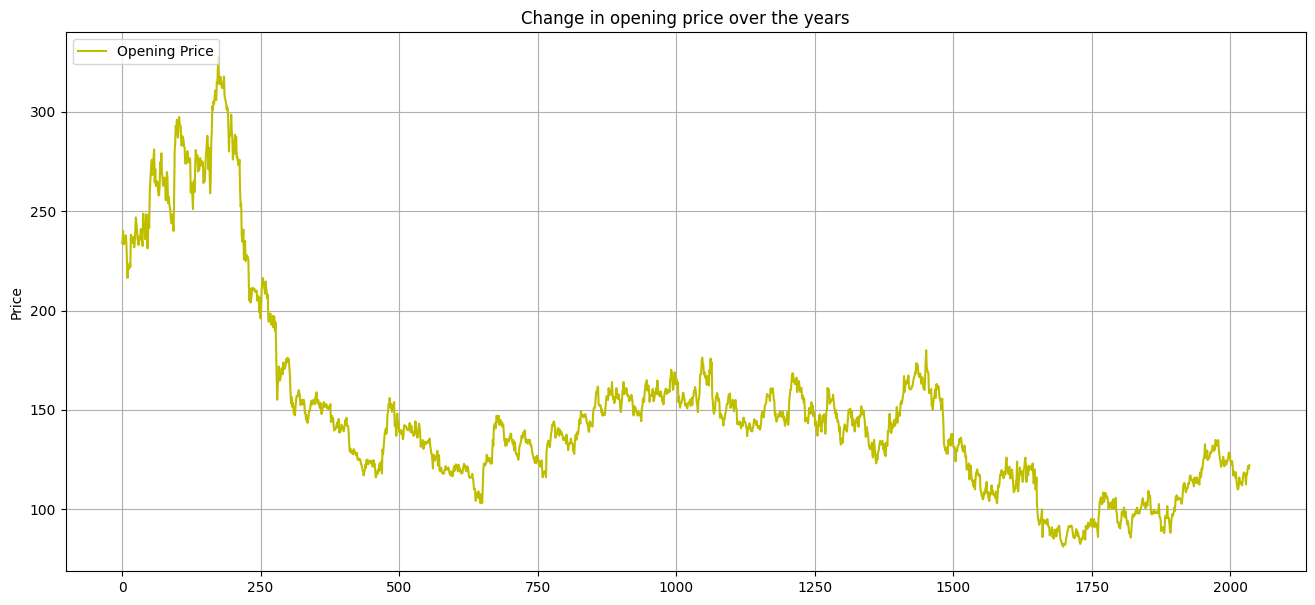

In [14]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='y',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

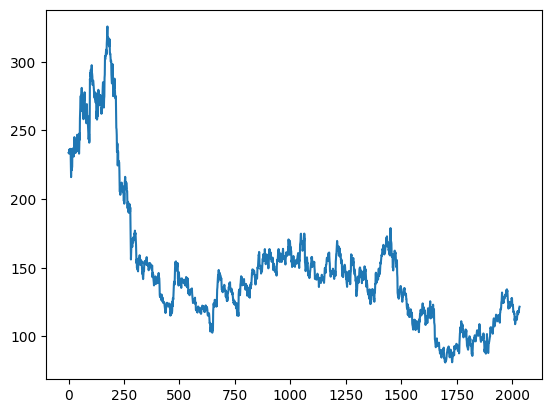

In [15]:
temp = df.reset_index()['Close']
plt.plot(temp)

In [16]:
temp

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

# Train Test Split

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
temp = scaler.fit_transform(np.array(temp).reshape(-1,1))

In [18]:
temp.shape

(2035, 1)

In [19]:
temp

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [20]:
training_size = int(len(temp) * 0.75)
test_size = len(temp) - training_size
train_data,test_data = temp[0:training_size,:], temp[training_size:len(temp),:1]

In [21]:
training_size, test_size

(1526, 509)

In [22]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [24]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [25]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [26]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [27]:
### Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 40, batch_size = 64, verbose = 1)

Epoch 1/40
23/23 [==============================] - 12s 291ms/step - loss: 0.0222 - val_loss: 0.0074
Epoch 2/40
23/23 [==============================] - 5s 203ms/step - loss: 0.0027 - val_loss: 7.9220e-04
Epoch 3/40
23/23 [==============================] - 5s 221ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/40
23/23 [==============================] - 5s 217ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/40
23/23 [==============================] - 5s 213ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/40
23/23 [==============================] - 5s 219ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/40
23/23 [==============================] - 5s 204ms/step - loss: 0.0013 - val_loss: 9.1400e-04
Epoch 8/40
23/23 [==============================] - 5s 210ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 9/40
23/23 [==============================] - 5s 221ms/step - loss: 0.0011 - val_loss: 9.7120e-04
Epoch 10/40
23/23 [==============================] - 5s 213ms/step - loss: 0.0011 - val

In [30]:
#predictions
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 1s 57ms/step


In [31]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

163.37227916895736

In [33]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

107.47015890303265

In [35]:
#Plotting
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(temp)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(temp)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(temp) - 1, :] = test_predict

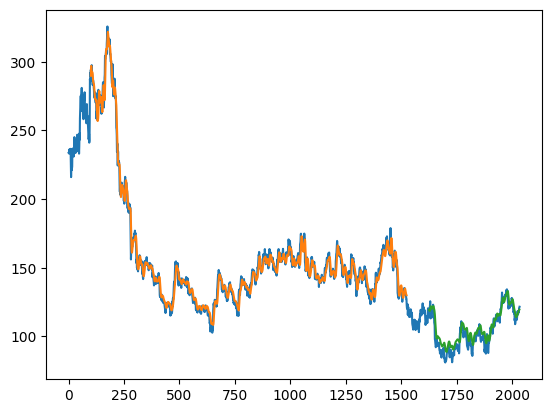

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [37]:
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(temp))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [38]:
#Predict the next 28 days Stock Price
len(test_data), x_test.shape

(509, (408, 100, 1))

In [39]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.16144821]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

9 day output [[0.17253597]]
10 day input [0.11846405 0.14644608 0.14808007 0.15910948 0.15992647 0.15788399
 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908 0.18974673
 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458
 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327

18 day output [[0.18099332]]
19 day input [0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16144821 0.16357362 0.16531399
 0.16670555 0.1678524

In [41]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [42]:
day_new.shape

(100,)

In [43]:
day_pred.shape

(28,)

In [45]:
len(temp)

2035

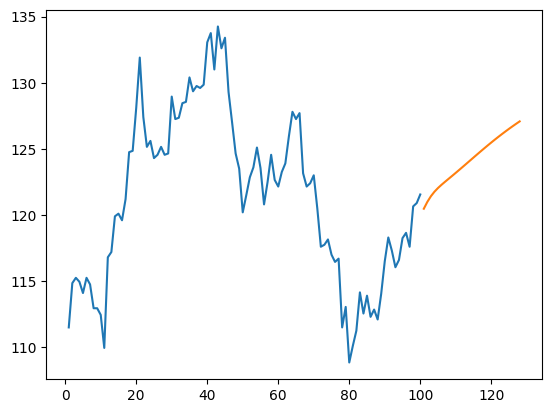

In [47]:
plt.plot(day_new, scaler.inverse_transform(temp[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

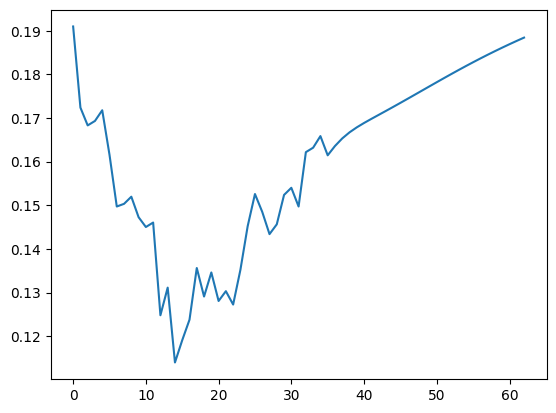

In [49]:
data_new = temp.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [50]:
data_new =scaler.inverse_transform(data_new).tolist()

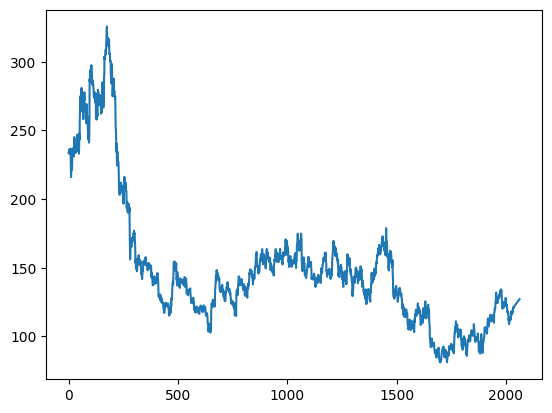

In [51]:
plt.plot(data_new)